In [ ]:
# Filepath to your text file
filepath = 'path_to_alice_in_wonderland.txt'

# Read and process the text
text = read_text_file(filepath)
cleaned_text = clean_text(text)

# Analyze sentiment
sentiment_scores = analyze_sentiment(cleaned_text)

# Plot the sentiment
plot_sentiment(sentiment_scores)


In [1]:
from pathlib import Path

In [6]:
from llm.config import DATA_DIR
filepath = DATA_DIR.joinpath('alice_in_wonderland.txt')

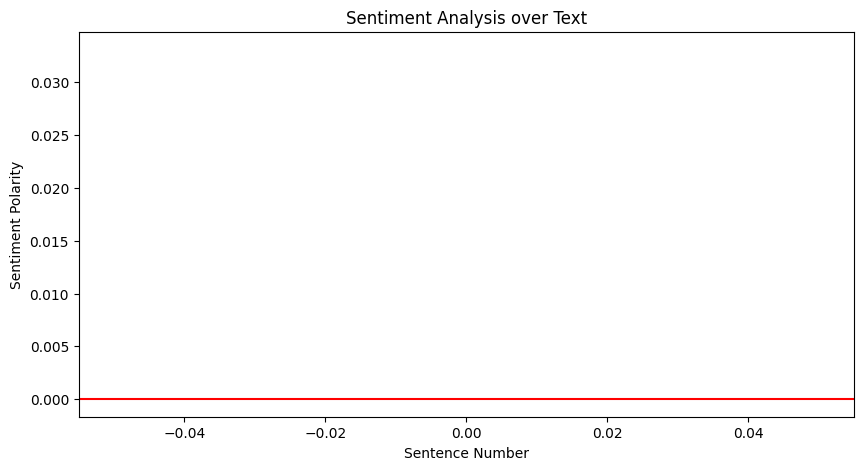

In [7]:
from llm.core.functions import read_text_file, clean_text, analyze_sentiment, plot_sentiment

# Read and process the text
text = read_text_file(filepath)
cleaned_text = clean_text(text)

# Analyze sentiment
sentiment_scores = analyze_sentiment(cleaned_text)

# Plot the sentiment
plot_sentiment(sentiment_scores)

In [10]:
sentiment_scores

[0.03311042728221506]

In [11]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

plt.style.use('ggplot')

import nltk

ModuleNotFoundError: No module named 'pandas'